In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [5]:
G = nx.read_edgelist("/content/gdrive/My Drive/users_filtered.edgelist")

In [6]:
nx.number_of_nodes(G)

59848

In [8]:
groupDf = df[['user_id', 'Toxicity','week','month']]

In [15]:
weekDf = groupDf[groupDf['week']=="01"]

In [25]:
weekDf.head()

,user_id,Toxicity,week,month
3722,714557249604227075,0.004304,01,01
3723,714557249604227075,0.007665,01,01
5293,20430045,0.399880,01,01
5294,20430045,0.028856,01,01
5295,20430045,0.168519,01,01


In [28]:
neigh = list(nx.neighbors(G, str(714557249604227075)))

In [21]:
def mean_toxicity_score_for_neighbors(user_id):
    neighbors = list(nx.neighbors(G, str(user_id)))
    tweets_from_neighbors_df = weekDf[weekDf["user_id"].isin(neighbors)]
    mean_toxicity_score = tweets_from_neighbors_df["Toxicity"].mean()
    return mean_toxicity_score

In [22]:
def mean_toxicity_score_for_user(user_id):
    tweets_from_user_df = weekDf[weekDf["user_id"] == user_id]
    mean_toxicity_score = tweets_from_user_df["Toxicity"].mean()
    return mean_toxicity_score

In [18]:
mean_toxicity_score_for_neighbors_dict = {}
mean_toxicity_score_for_user_dict = {}
for user in G.nodes():
    mean_toxicity_score_for_neighbors_dict[user] = mean_toxicity_score_for_neighbors(user)
    mean_toxicity_score_for_user_dict[user] = mean_toxicity_score_for_user(user)

In [23]:
x = list(mean_toxicity_score_for_user_dict.values())
y = list(mean_toxicity_score_for_neighbors_dict.values())

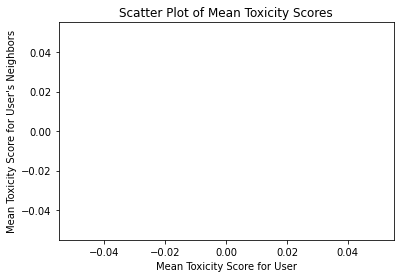

In [24]:
plt.scatter(x, y)
plt.xlabel("Mean Toxicity Score for User")
plt.ylabel("Mean Toxicity Score for User's Neighbors")
plt.title("Scatter Plot of Mean Toxicity Scores")
plt.show()